In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###EDA

In [ ]:
train = pd.read_csv('train_PDjVQMB.csv')
test = pd.read_csv('test_lTY72QC.csv')

In [ ]:
test_id = test.iloc[:,0]
train = train.iloc[:,1:]
test = test.iloc[:,1:]

In [ ]:
train.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [ ]:
print('Shape of train data',train.shape)
print('Shape of test data',test.shape)

Shape of train data (6650, 10)
Shape of test data (2851, 9)


In [ ]:
print(train.isna().sum())
print('*'*100)
print(test.isna().sum())

Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64
****************************************************************************************************
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64


There are no missing data in train and test 

Age

In [ ]:
count = np.sort(train['Age'].value_counts())
age = list(train['Age'].value_counts().index)

<BarContainer object of 52 artists>

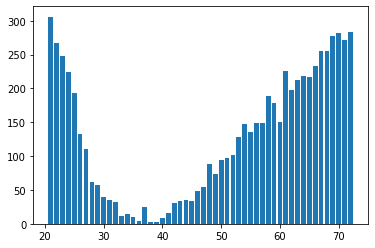

In [ ]:
plt.bar(age,count)

We can see that people in the range 30-40 are less in number , where as Customers of age around 20-21 are more in number

In [ ]:
print(train['Age'].max())
print(train['Age'].min())
print(train['Age'].mean())

72
21
41.130225563909775


1. max age = 72 
2. min age = 21 
3. average people age = 41.13

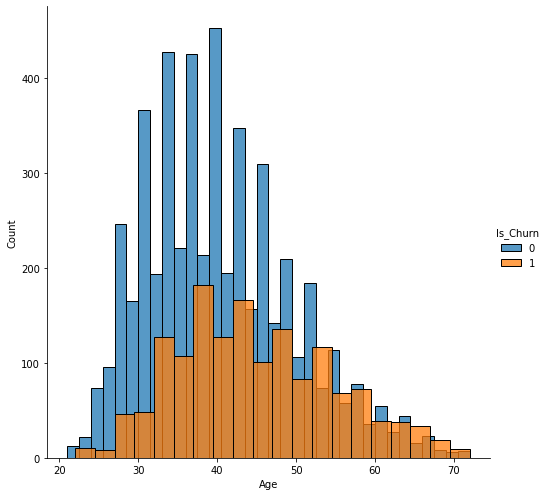

In [ ]:
sns.FacetGrid(train,hue = 'Is_Churn',height = 7).map(sns.histplot,'Age').add_legend()

Customers of age range 35 - 45 are more likely to have churn = 1

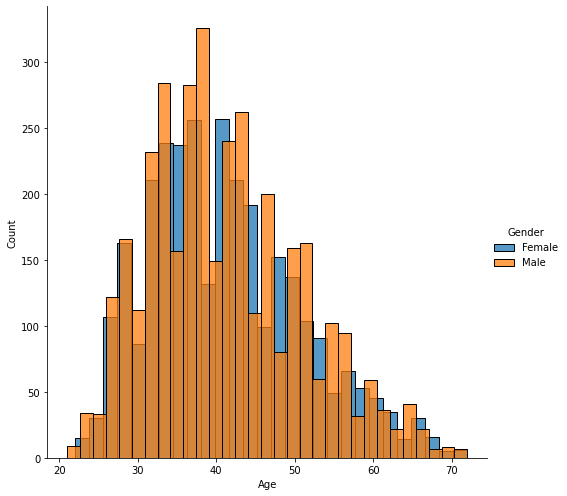

In [ ]:
sns.FacetGrid(train,hue = 'Gender',height = 7).map(sns.histplot,'Age').add_legend()

Male Customers are more likely to have churn = 1

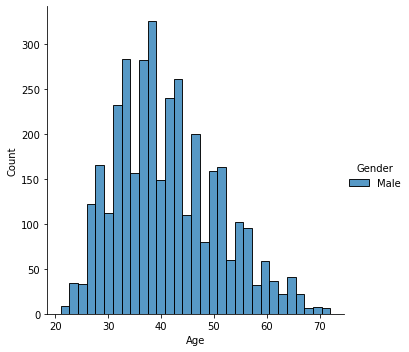

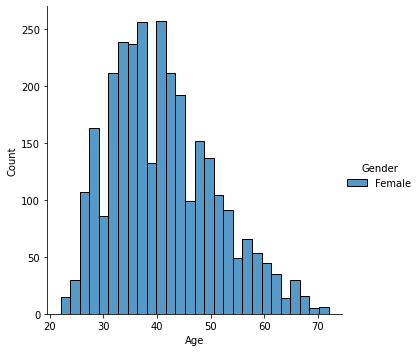

In [ ]:
sns.FacetGrid(train[:][train['Gender']=='Male'],hue = 'Gender',height = 5).map(sns.histplot,'Age').add_legend()
sns.FacetGrid(train[:][train['Gender']=='Female'],hue = 'Gender',height = 5).map(sns.histplot,'Age').add_legend()

1. Both male and female customers of middle age are more in number

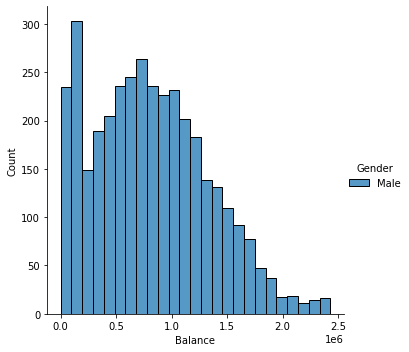

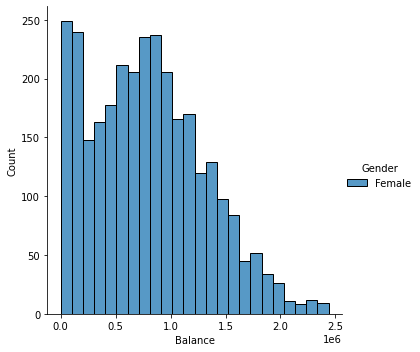

In [ ]:
sns.FacetGrid(train[:][train['Gender']=='Male'],hue = 'Gender',height = 5).map(sns.histplot,'Balance').add_legend()
sns.FacetGrid(train[:][train['Gender']=='Female'],hue = 'Gender',height = 5).map(sns.histplot,'Balance').add_legend()

1. We can see that people with low balance are more in number and less customers with high balance

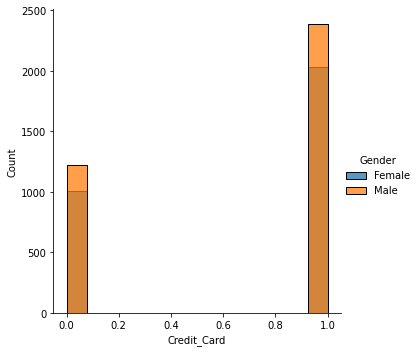

In [ ]:
sns.FacetGrid(train,hue = 'Gender',height = 5).map(sns.histplot,'Credit_Card').add_legend()
#sns.FacetGrid(train[:][train['Gender']=='Female'],hue = 'Gender',height = 5).map(sns.histplot,'Credit_Card').add_legend()

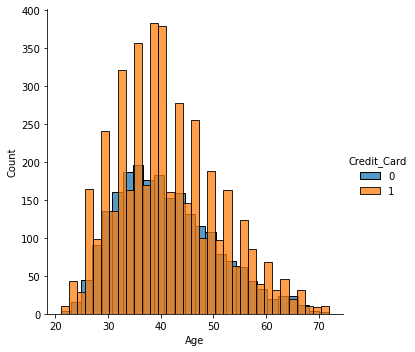

In [ ]:
sns.FacetGrid(train,hue = 'Credit_Card',height = 5).map(sns.histplot,'Age').add_legend()

People of age range 30-50 are more likely to have Credit_card

Male Customers with credit card are more in number

Income

In [ ]:
print(train['Income'].value_counts())

10L - 15L        1885
5L - 10L         1847
Less than 5L     1573
More than 15L    1345
Name: Income, dtype: int64


<BarContainer object of 4 artists>

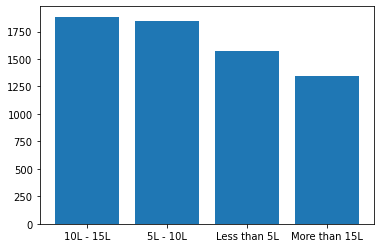

In [ ]:
plt.bar(train['Income'].value_counts().index,train['Income'].value_counts())

income range 10L-15L has more number of ids 
where as more than 15L are less in number

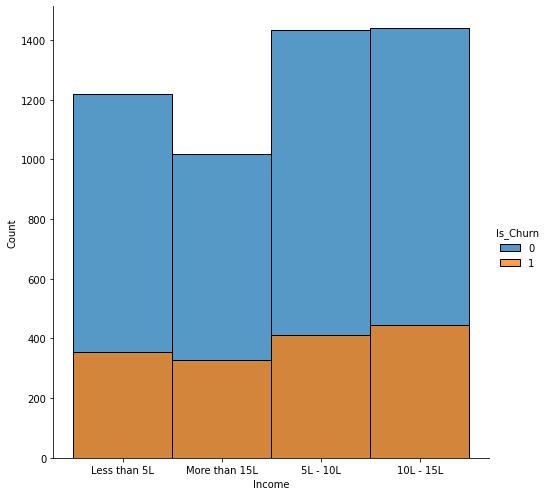

In [ ]:
sns.FacetGrid(train,hue = 'Is_Churn',height = 7).map(sns.histplot,'Income').add_legend()

We can see that 10L-15L has more of Churn rate

Balance

In [ ]:
train['Balance']

0        563266.44
1        875572.11
2        701607.06
3       1393922.16
4        893146.23
           ...    
6645    1354526.19
6646     596286.54
6647     979298.19
6648     395233.65
6649     826947.27
Name: Balance, Length: 6650, dtype: float64

PDF , CDF of Balance

[0.17308271 0.13172932 0.16796992 0.1712782  0.14165414 0.09849624
 0.06255639 0.03218045 0.01218045 0.00887218]
[0.17308271 0.30481203 0.47278195 0.64406015 0.78571429 0.88421053
 0.94676692 0.97894737 0.99112782 1.        ]


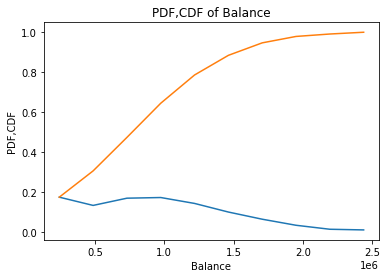

In [ ]:
counts,bin_edges = np.histogram(train['Balance'],bins=10,density=True)
pdf = counts/np.sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF,CDF of Balance')
plt.xlabel('Balance')
plt.ylabel('PDF,CDF')
plt.show()

We can see that most of the people are having balance in the range 0.5e6 - 1e6

Minimum Balance 63.0
Maximum Balance 2436615.81
Mean Balance 804595.354984962


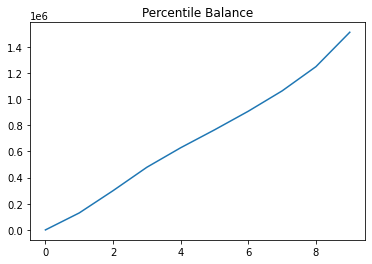

In [ ]:
print('Minimum Balance',train['Balance'].min())
print('Maximum Balance',train['Balance'].max())
print('Mean Balance',train['Balance'].mean())
plt.title('Percentile Balance')
plt.plot(np.percentile(train['Balance'],np.arange(0,100,10)))

In [ ]:
print(train['Balance'].value_counts())

117549.00     2
76122.00      2
131121.00     2
102123.00     2
138825.00     2
             ..
289348.92     1
1031298.48    1
242901.27     1
719339.85     1
826947.27     1
Name: Balance, Length: 6643, dtype: int64


Vintage

In [ ]:
print(train['Vintage'].value_counts())

3    1405
1    1354
2    1328
4    1296
0     956
5     311
Name: Vintage, dtype: int64


We can see that very few people are having bank account from 5 years , Majority are having account from 3 years

FacetGrid : Vintage

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


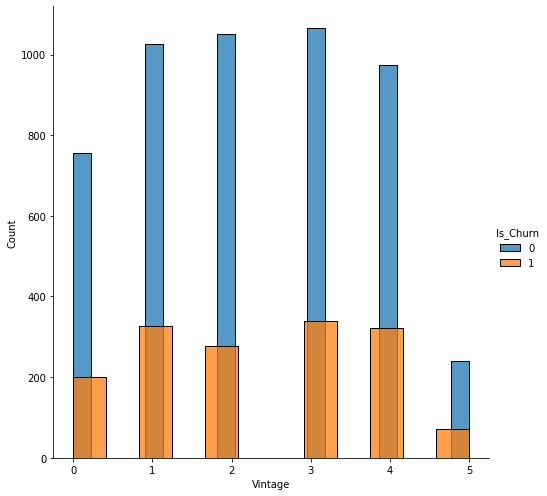

In [ ]:
sns.FacetGrid(train,hue = 'Is_Churn',size = 7).map(sns.histplot,'Vintage').add_legend()

We can see that people with Vintage 1 and 3 are having highest Churn rate, 5 has low churn rate

Grouping Vintage Based on Mean Churn 

In [ ]:
train[['Vintage','Is_Churn']].groupby(by = 'Vintage').mean()

,Is_Churn
Vintage,
0,0.210251
1,0.242245
2,0.207831
3,0.241281
4,0.247685
5,0.231511


We can Concluded from above graph that Vintage 4 has highest 0:1 ratio , i e percentage of Churn is more in 4

Transaction Status

In [ ]:
train['Transaction_Status'].value_counts()

1    3430
0    3220
Name: Transaction_Status, dtype: int64

FacetGrid : Transaction_Status

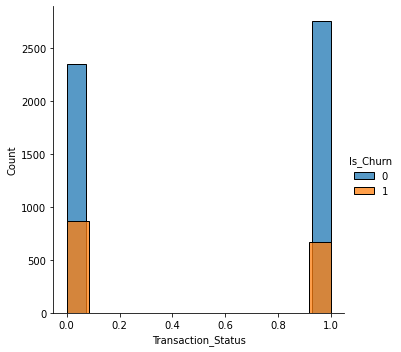

In [ ]:
sns.FacetGrid(train,hue = 'Is_Churn', height = 5).map(sns.histplot,'Transaction_Status').add_legend()

Customer with no transaction from past 3 months are more likely to churn 

Income & Transaction_Status

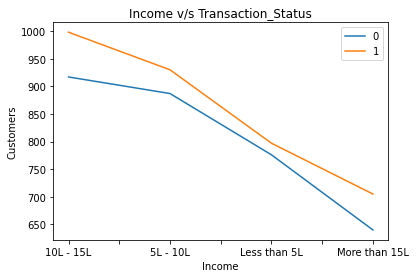

In [ ]:
d = train['Income'][train['Transaction_Status']==0].value_counts()
d.plot(label = 0)
d = train['Income'][train['Transaction_Status']==1].value_counts()
d.plot(label = 1)
plt.legend()
plt.title('Income v/s Transaction_Status')
plt.xlabel('Income')
plt.ylabel('Customers')
plt.show()

1. We can see that customers with Income range 10L-15L are more likely to have made transaction in last 3 months

In [ ]:
train.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


Product_Holdings

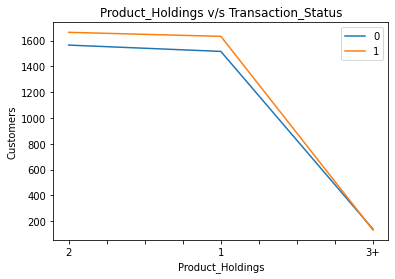

In [ ]:
d = train['Product_Holdings'][train['Transaction_Status']==0].value_counts()
d.plot(label = 0)
d = train['Product_Holdings'][train['Transaction_Status']==1].value_counts()
d.plot(label = 1)
plt.legend()
plt.title('Product_Holdings v/s Transaction_Status')
plt.xlabel('Product_Holdings')
plt.ylabel('Customers')
plt.show()

1. we can see that both Transaction_Status 1 and 0 are having similar pattern
2. Most of the Customers are having 2 product holdings
3. Very few are having 3+ product holdings

FacetGrid: Product_Holdings

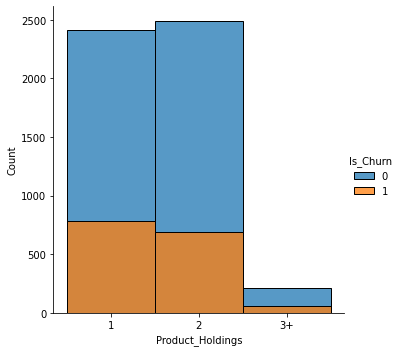

In [ ]:
sns.FacetGrid(train,hue='Is_Churn',height=5).map(sns.histplot,'Product_Holdings').add_legend()

1. Customer with 1 product_holdings are more likely to have churn = 1

FacetGrid : product_holdings vs balance

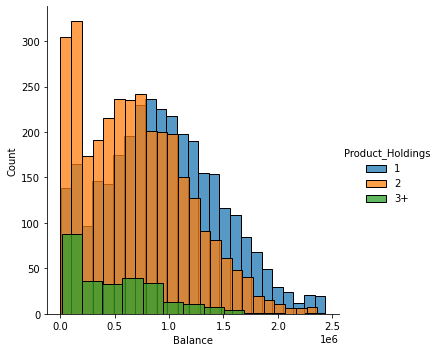

In [ ]:
sns.FacetGrid(train,hue='Product_Holdings',height=5).map(sns.histplot,'Balance').add_legend()

1. Customers with less Balance are having 2 product Holdings
2. Customers with more Balance are having 1 Product Holdings


Credit card

In [ ]:
train['Credit_Card'].value_counts()

1    4418
0    2232
Name: Credit_Card, dtype: int64

Many people are having credit card

Credit_card vs Is_Churn

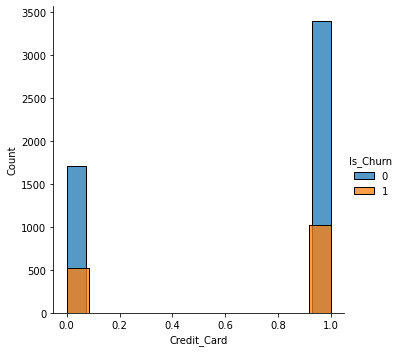

In [ ]:
sns.FacetGrid(train,hue='Is_Churn',height=5).map(sns.histplot,'Credit_Card').add_legend()

Credit card vs Income

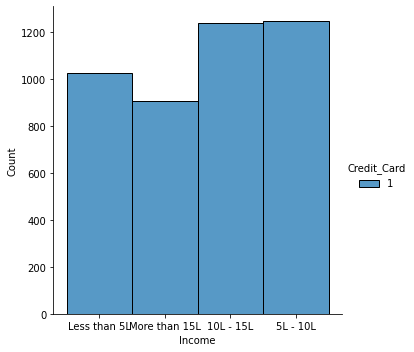

In [ ]:
sns.FacetGrid(train[['Credit_Card','Income']][train['Credit_Card']==1],hue='Credit_Card',height=5).map(sns.histplot,'Income').add_legend()

1. Customers with income in the range 5L-10L are more likely to have a credit card
2. Customers with income more than 15L are less likely to have a credit card 


Credit Card vs Balance

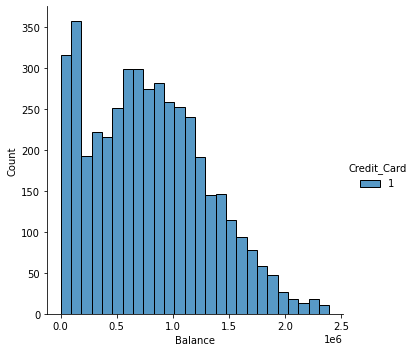

In [ ]:
sns.FacetGrid(train[['Credit_Card','Balance']][train['Credit_Card']==1],hue='Credit_Card',height=5).map(sns.histplot,'Balance').add_legend()

1. Customers with less Balance are more likely to use Credit_card

Credit_score

In [ ]:
train['Credit_Category'].value_counts()

Poor       3076
Average    2043
Good       1531
Name: Credit_Category, dtype: int64

Most customers are having Poor Credit score

Credit_Category vs is_churned

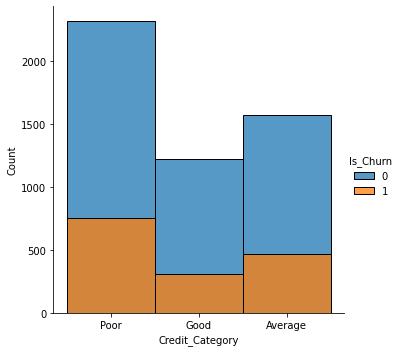

In [ ]:
sns.FacetGrid(train,hue='Is_Churn',height=5).map(sns.histplot,'Credit_Category').add_legend()

People with Poor Category are more likely to churn 

In [ ]:
d = train[['Balance','Credit_Category']][train['Credit_Category']=='Poor']

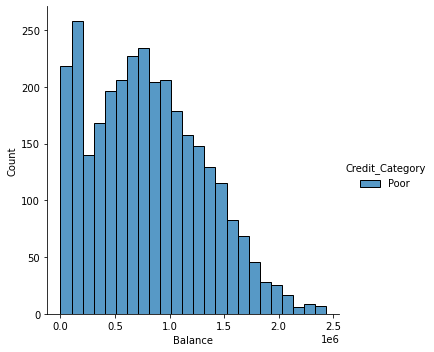

In [ ]:
sns.FacetGrid(d,hue='Credit_Category',height=5).map(sns.histplot,'Balance').add_legend()

In [ ]:
target = train['Is_Churn']
#train = train.drop(labels=['Is_Churn'],axis = 1,inplace = True)

In [ ]:
train.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [ ]:
train = train.iloc[:,:-1]

In [ ]:
print(train.shape,len(target))
print(test.shape)

(6650, 9) 6650
(2851, 9)


###Feature Transformation

Categorizing gender feature

Gender

train

In [ ]:
for i in range(len(train)):
  if train.loc[i,'Gender'] == 'Male':
    train.loc[i,'Gender'] = 1
  else :
    train.loc[i,'Gender'] = 0

In [ ]:
train.loc[:,'Gender'].value_counts()

1    3612
0    3038
Name: Gender, dtype: int64

test

In [ ]:
for i in range(len(test)):
  if test.loc[i,'Gender'] == 'Male':
    test.loc[i,'Gender'] = 1
  else :
    test.loc[i,'Gender'] = 0

In [ ]:
test['Gender'].value_counts()

1    1545
0    1306
Name: Gender, dtype: int64

Income

train

In [ ]:
for i in range(len(train)):
  if train.loc[i,'Income'] == 'Less than 5L':
    train.loc[i,'Income'] = 0
  elif train.loc[i,'Income'] == 'More than 15L':
    train.loc[i,'Income'] = 3
  elif train.loc[i,'Income'] == '5L - 10L':
    train.loc[i,'Income'] = 1
  elif train.loc[i,'Income'] == '10L - 15L':
    train.loc[i,'Income'] = 2

In [ ]:
train['Income'].value_counts()

2    1885
1    1847
0    1573
3    1345
Name: Income, dtype: int64

test

In [ ]:
for i in range(len(test)):
  if test.loc[i,'Income'] == 'Less than 5L':
    test.loc[i,'Income'] = 0
  elif test.loc[i,'Income'] == 'More than 15L':
    test.loc[i,'Income'] = 3
  elif test.loc[i,'Income'] == '5L - 10L':
    test.loc[i,'Income'] = 1
  elif test.loc[i,'Income'] == '10L - 15L':
    test.loc[i,'Income'] = 2
test['Income'].value_counts()

2    844
1    794
0    648
3    565
Name: Income, dtype: int64

Product_Holdings

In [ ]:
for i in range(len(train)):
  if train.loc[i,'Product_Holdings'] =='3+':
    train.loc[i,'Product_Holdings'] = 3
  if train.loc[i,'Product_Holdings'] =='1':
    train.loc[i,'Product_Holdings'] = 1
  if train.loc[i,'Product_Holdings'] =='2':
    train.loc[i,'Product_Holdings'] = 2
for i in range(len(test)):
  if test.loc[i,'Product_Holdings'] =='3+':
    test.loc[i,'Product_Holdings'] = 3
  if test.loc[i,'Product_Holdings'] =='1':
    test.loc[i,'Product_Holdings'] = 1
  if test.loc[i,'Product_Holdings'] =='2':
    test.loc[i,'Product_Holdings'] = 2

Credit_Category

train

In [ ]:
for i in range(len(train)):
  if train.loc[i,'Credit_Category'] == 'Poor':
    train.loc[i,'Credit_Category'] = 0
  elif train.loc[i,'Credit_Category'] == 'Average':
    train.loc[i,'Credit_Category'] = 1
  elif train.loc[i,'Credit_Category'] == 'Good':
    train.loc[i,'Credit_Category'] = 2
train['Credit_Category'].value_counts()

0    3076
1    2043
2    1531
Name: Credit_Category, dtype: int64

test

In [ ]:
for i in range(len(test)):
  if test.loc[i,'Credit_Category'] == 'Poor':
    test.loc[i,'Credit_Category'] = 0
  elif test.loc[i,'Credit_Category'] == 'Average':
    test.loc[i,'Credit_Category'] = 1
  elif test.loc[i,'Credit_Category'] == 'Good':
    test.loc[i,'Credit_Category'] = 2
test['Credit_Category'].value_counts()

0    1270
1     866
2     715
Name: Credit_Category, dtype: int64

Balance Min Max Scaling

Train

In [ ]:
min = int(train['Balance'].min())
#print(min)
max = int(train['Balance'].max())
#print(max)
l = len(train)
for i in range(l):
  amt = train.loc[i,'Balance']
  amt = (amt-min)/(max-min)
  train.loc[i,'Balance'] = amt

In [ ]:
train['Balance'].head()

0    0.231148
1    0.359323
2    0.287925
3    0.572062
4    0.366536
Name: Balance, dtype: float64

Test

In [ ]:
min = int(test['Balance'].min())
#print(min)
max = int(test['Balance'].max())
#print(max)
l = len(test)
for i in range(l):
  amt = test.loc[i,'Balance']
  amt = (amt-min)/(max-min)
  test.loc[i,'Balance'] = amt

In [ ]:
test['Balance'].head()

0    0.413891
1    0.139709
2    0.179983
3    0.011128
4    0.453304
Name: Balance, dtype: float64

Target

In [ ]:
target.value_counts()
print('{}% of Custormers are having Is_churn = 0'.format(target.value_counts()[0]/len(target)))
print('{}% of Custormers are having Is_churn = 1'.format(target.value_counts()[1]/len(target)))

0.7688721804511278% of Custormers are having Is_churn = 0
0.23112781954887218% of Custormers are having Is_churn = 1


Base Models

###Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_cv , y_train , y_cv = train_test_split(train,target,test_size = 0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#https://scikit-learn.org/stable/modules/preprocessing.html

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipe.fit(X_train, y_train)
y_cv_pred = pipe.predict(X_cv)
y_cv_pred_prob = pipe.predict_proba(X_cv)

Text(0.5, 1.0, 'Confusion Matrix : Logistic Regression cv')

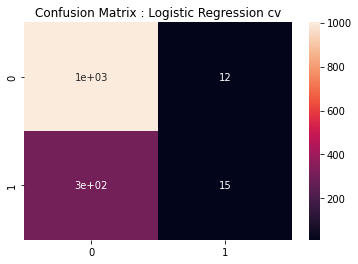

In [ ]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : Logistic Regression cv')

In [ ]:
from sklearn.metrics import f1_score
f1_LR = f1_score(y_cv, y_cv_pred, average='macro')
print(f1_LR)

0.47581535928023455


In [ ]:
y_test_pred = pipe.predict(test)

In [ ]:
y_test_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
output1 = pd.DataFrame(np.column_stack([test_id,y_test_pred]), columns = ('ID','Is_Churn'))
output1.to_csv('ChurnSub1.csv',index = False)

In [ ]:
output1

,ID,Is_Churn
0,55480787,0
1,9aededf2,0
2,a5034a09,0
3,b3256702,0
4,dc28adb5,0
...,...,...
2846,19e40adf,0
2847,52d5bc8d,0
2848,f708121b,1
2849,f008715d,0


In [ ]:
output1.isna().sum()

ID          0
Is_Churn    0
dtype: int64

In [ ]:
from google.colab import files
files.download('ChurnSub1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We can see that the data is Imbalance in nature

###Decision Tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(X_train, y_train)
y_cv_pred = pipe.predict(X_cv)
y_cv_pred_prob = pipe.predict_proba(X_cv)

Text(0.5, 1.0, 'Confusion Matrix : Decision Tree')

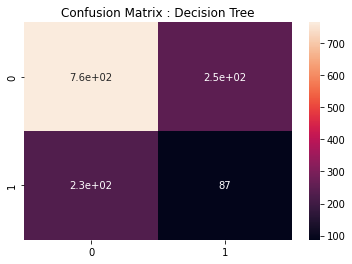

In [ ]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : Decision Tree')

In [ ]:
from sklearn.metrics import f1_score
f1_DT = f1_score(y_cv, y_cv_pred, average='macro')
f1_DT

0.5138989036076642

###SVM

In [ ]:
from sklearn.svm import SVC
from sklearn import tree
clf = SVC()
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(X_train, y_train)
y_cv_pred = pipe.predict(X_cv)
#y_cv_pred_prob = pipe.predict_proba(X_cv)

Text(0.5, 1.0, 'Confusion Matrix : SVC')

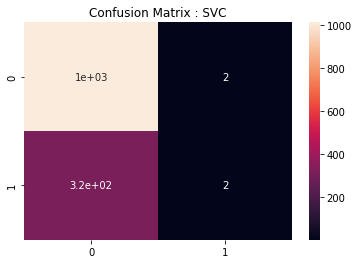

In [ ]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : SVC')

In [ ]:
from sklearn.metrics import f1_score
f1_SVC = f1_score(y_cv, y_cv_pred, average='macro')
f1_SVC

0.438466527884883

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = RandomForestClassifier(max_depth=2, random_state=0)
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(X_train, y_train)
y_cv_pred = pipe.predict(X_cv)
y_cv_pred_prob = pipe.predict_proba(X_cv)

Text(0.5, 1.0, 'Confusion Matrix : Random Forest')

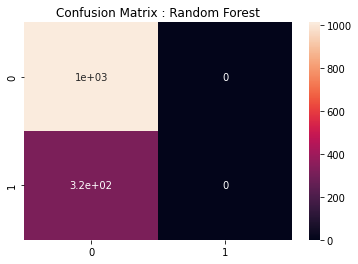

In [ ]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : Random Forest')

In [ ]:
from sklearn.metrics import f1_score
f1_RF = f1_score(y_cv, y_cv_pred, average='macro')
f1_RF

0.43235168587281264

###XGBoost

In [ ]:
from xgboost import XGBClassifier

pipe = make_pipeline(StandardScaler(), XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27))
pipe.fit(X_train, y_train)
y_cv_pred = pipe.predict(X_cv)
y_cv_pred_prob = pipe.predict_proba(X_cv)

Text(0.5, 1.0, 'Confusion Matrix : XGBoost')

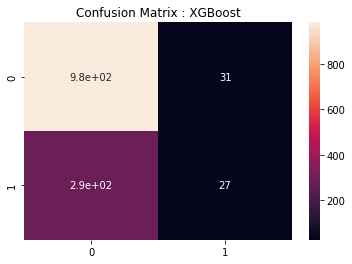

In [ ]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : XGBoost')

In [ ]:
from sklearn.metrics import f1_score
f1_XGB = f1_score(y_cv, y_cv_pred, average='macro')
f1_XGB

0.5017592997811816

In [ ]:
#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(), 
 param_grid = param_test1,n_jobs=4, cv=5)

### Summary Base

In [ ]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Model", "ROC_test"]
x.add_row(["Logistic Regression ",f1_LR])
x.add_row(["Decision Tree       ",f1_DT])
x.add_row(["SVC                 ",f1_SVC])
x.add_row(["Random Forest       ",f1_RF])
x.add_row(["XGBoost             ",f1_XGB])
print(x)

+----------------------+---------------------+
|        Model         |       ROC_test      |
+----------------------+---------------------+
| Logistic Regression  | 0.47581535928023455 |
| Decision Tree        |  0.5138989036076642 |
| SVC                  |  0.438466527884883  |
| Random Forest        | 0.43235168587281264 |
| XGBoost              |  0.5017592997811816 |
+----------------------+---------------------+


We can see that Decision is working better than all other models

Decision Tree : Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

###Base Model

Hyper parameter tuning

In [ ]:
'''

class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
class_weight=None, ccp_alpha=0.0)[source]

'''
model = tree.DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
parameter = {'max_depth':[3,5,10,50],
             'max_leaf_nodes':[5,10,50,100]}
clf = GridSearchCV(model,parameter)
clf.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, 50],
                         'max_leaf_nodes': [5, 10, 50, 100]})

In [ ]:
clf.best_params_

{'max_depth': 3, 'max_leaf_nodes': 5}

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(X_train, y_train)
y_cv_pred = pipe.predict(X_cv)
y_cv_pred_prob = pipe.predict_proba(X_cv)

Text(0.5, 1.0, 'Confusion Matrix : Decision Tree')

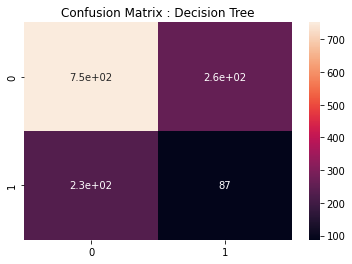

In [ ]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : Decision Tree')

In [ ]:
from sklearn.metrics import f1_score
f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
f1_DT_

0.5077694235588972

In [ ]:
y_test_pred = pipe.predict(test)
output1 = pd.DataFrame(np.column_stack([test_id,y_test_pred]), columns = ('ID','Is_Churn'))
output1.to_csv('ChurnSub2.csv',index = False)
files.download('ChurnSub2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Default decision Tree works better than Tuned one

###Upsampling

In [ ]:
train.columns

Index(['Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status',
       'Product_Holdings', 'Credit_Card', 'Credit_Category'],
      dtype='object')

In [ ]:

train2 = pd.DataFrame(np.column_stack((train,target)), columns=('Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status',
       'Product_Holdings', 'Credit_Card', 'Credit_Category','Is_Churn'))


In [ ]:
train2['Is_Churn'].value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [ ]:
#https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
majority = train2[(train2['Is_Churn']==0)] 
minority = train2[(train2['Is_Churn']==1)] 
# upsample minority class
df_minority_upsampled = resample(minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 5113, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, majority],ignore_index=True)

In [ ]:
df_upsampled['Is_Churn'].value_counts()
up_target = df_upsampled['Is_Churn']
df_upsampled = df_upsampled.iloc[:,:-1]

In [ ]:
print(df_upsampled.shape,len(up_target))

(10226, 9) 10226


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_cv , y_train , y_cv = train_test_split(df_upsampled,up_target.astype(int),test_size = 0.2)

In [ ]:
print(X_train.shape,len(y_train))
print(X_cv.shape,len(y_cv))

(8180, 9) 8180
(2046, 9) 2046


####Decision Tree

Text(0.5, 1.0, 'Confusion Matrix : Decision Tree')

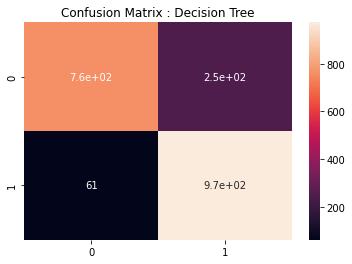

In [ ]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
from sklearn import tree
clf = tree.DecisionTreeClassifier()
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(X_train, y_train)
y_cv_pred = pipe.predict(X_cv)
y_cv_pred_prob = pipe.predict_proba(X_cv)
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : Decision Tree')

In [ ]:
from sklearn.metrics import f1_score
f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
f1_DT_

0.8473501151126558

In [ ]:
y_test_pred = pipe.predict(test)
output1 = pd.DataFrame(np.column_stack([test_id,y_test_pred]), columns = ('ID','Is_Churn'))
output1.to_csv('ChurnSub3.csv',index = False)
files.download('ChurnSub3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####Logistic Regression with upsampled data

In [ ]:
from sklearn import tree
clf = LogisticRegression()
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(X_train, y_train)
y_cv_pred = pipe.predict(X_cv)
y_cv_pred_prob = pipe.predict_proba(X_cv)

Text(0.5, 1.0, 'Confusion Matrix :Logistic Regression')

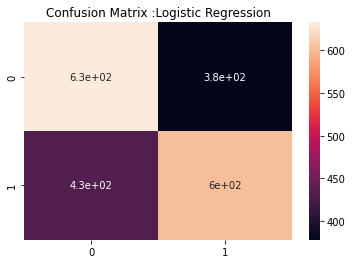

In [ ]:
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix :Logistic Regression')

In [ ]:
from sklearn.metrics import f1_score
f1_LR_ = f1_score(y_cv, y_cv_pred, average='macro')
f1_LR_

0.6040204376548308

####Random Forest with upsampled data

Text(0.5, 1.0, 'Confusion Matrix : Random Forest')

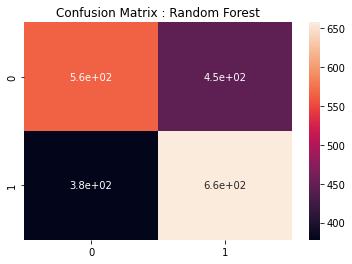

In [ ]:
from sklearn import tree
clf = RandomForestClassifier(max_depth=2, random_state=0)
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(X_train, y_train)
y_cv_pred = pipe.predict(X_cv)
y_cv_pred_prob = pipe.predict_proba(X_cv)
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : Random Forest')

In [ ]:
from sklearn.metrics import f1_score
f1_RF_ = f1_score(y_cv, y_cv_pred, average='macro')
f1_RF_

0.5964469994149824

####XGBoost with upsampled data

In [ ]:
from sklearn import tree
clf = XGBClassifier()
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(X_train, y_train)
y_cv_pred = pipe.predict(X_cv)
y_cv_pred_prob = pipe.predict_proba(X_cv)
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : Random Forest')

<bound method Pipeline.get_params of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier', XGBClassifier())])>

In [ ]:
from sklearn.metrics import f1_score
f1_XGB_ = f1_score(y_cv, y_cv_pred, average='macro')
f1_XGB_

0.6198269238265393

In [ ]:
y_test_pred = pipe.predict(test)
output1 = pd.DataFrame(np.column_stack([test_id,y_test_pred]), columns = ('ID','Is_Churn'))
output1.to_csv('ChurnSub11.csv',index = False)
files.download('ChurnSub11.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

XGB Hyperparameter tuning

*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0

0.5986370875152772


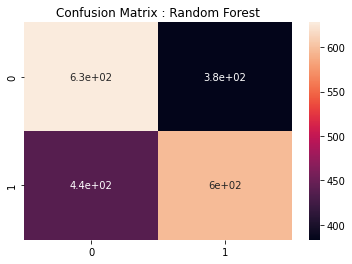

In [ ]:
estimator = XGBClassifier(learning_rate =0.1, n_estimators=3, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)


parameter = {'min_samples_leaf':[1],'min_samples_split':[2]}
clf = GridSearchCV(estimator,parameter)
train = np.array(X_train)
cv = np.array(X_cv)
clf.fit(train,y_train)
y_cv_pred = clf.predict(cv)
#y_cv_pred_prob = pipe.predict_proba(cv)
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : Random Forest')
from sklearn.metrics import f1_score
f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
print(f1_DT_)

n_estimators:27

In [ ]:
clf.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
y_test_pred = pipe.predict(test)
output1 = pd.DataFrame(np.column_stack([test_id,y_test_pred]), columns = ('ID','Is_Churn'))
output1.to_csv('ChurnSub17.csv',index = False)
files.download('ChurnSub17.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We can observe that Decesion Tree performs better than remaining models even with upsampled data

####Summary : upsampled Data

In [ ]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Model", "ROC_test"]
x.add_row(["Logistic Regression ",f1_LR_])
x.add_row(["Decision Tree       ",f1_DT_])
#x.add_row(["SVC                 ",f1_SVC])
x.add_row(["Random Forest       ",f1_RF_])
x.add_row(["XGBoost             ",f1_XGB_])
print(x)

+----------------------+--------------------+
|        Model         |      ROC_test      |
+----------------------+--------------------+
| Logistic Regression  | 0.6040204376548308 |
| Decision Tree        | 0.8473501151126558 |
| Random Forest        | 0.5964469994149824 |
| XGBoost              | 0.6198269238265393 |
+----------------------+--------------------+


####Forward Feature Selection

In [ ]:
columns = df_upsampled.columns
for i in range(1,9):
  train = np.array(X_train.iloc[:,i]).reshape(-1,1)
  cv = np.array(X_cv.iloc[:,i]).reshape(-1,1)
  clf = tree.DecisionTreeClassifier()
  pipe = make_pipeline(StandardScaler(), clf)
  pipe.fit(train, y_train)
  y_cv_pred = pipe.predict(cv)
  y_cv_pred_prob = pipe.predict_proba(cv)
  from sklearn.metrics import f1_score
  f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
  print(columns[i],f1_DT_)


Gender 0.522784507008897
Income 0.4714053786081942
Balance 0.8394784709959239
Vintage 0.4885650642078079
Transaction_Status 0.5573433863715342
Product_Holdings 0.5224736534692138
Credit_Card 0.3307163886162905
Credit_Category 0.4750696435059954


We can see that Balance gives Good F1 score , next comes Transaction_Status

In [ ]:
columns = df_upsampled.columns
l = [0,1,2,4,5,6,7,8]
for i in range(len(l)):
  train = np.array(X_train.loc[:,('Balance',columns[l[i]])])
  cv = np.array(X_cv.loc[:,('Balance',columns[l[i]])])
  clf = tree.DecisionTreeClassifier()
  pipe = make_pipeline(StandardScaler(), clf)
  pipe.fit(train,y_train)
  y_cv_pred = pipe.predict(cv)
  y_cv_pred_prob = pipe.predict_proba(cv)
  from sklearn.metrics import f1_score
  f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
  print(columns[l[i]],f1_DT_)


Age 0.8417677771988219
Gender 0.843461210682295
Income 0.839789874413807
Vintage 0.8487856011129575
Transaction_Status 0.8403682609034876
Product_Holdings 0.8265478443101589
Credit_Card 0.8474420566536787
Credit_Category 0.8437787537404025


We can see that 'Balance' and 'Credit_Category' are giving better results, lets check the third feature

In [ ]:
columns = df_upsampled.columns
l = [0,1,2,5,6,7,8]
for i in range(len(l)):
  train = np.array(X_train.loc[:,('Balance','Vintage',columns[l[i]])])
  cv = np.array(X_cv.loc[:,('Balance','Vintage',columns[l[i]])])
  clf = tree.DecisionTreeClassifier()
  pipe = make_pipeline(StandardScaler(), clf)
  pipe.fit(train,y_train)
  y_cv_pred = pipe.predict(cv)
  y_cv_pred_prob = pipe.predict_proba(cv)
  from sklearn.metrics import f1_score
  f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
  print(l[i])
  print(columns[l[i]],f1_DT_)


0
Age 0.8438760814571333
1
Gender 0.8426892072902412
2
Income 0.8421773859500601
5
Transaction_Status 0.8481142867920641
6
Product_Holdings 0.8438760814571333
7
Credit_Card 0.8337121311075699
8
Credit_Category 0.839789874413807


We can see that Credit_Card is giving good result

In [ ]:
columns = df_upsampled.columns
l = [0,1,2,4,7,6]
for i in range(len(l)):
  train = np.array(X_train.loc[:,('Balance','Credit_Category','Transaction_Status',columns[l[i]])])
  cv = np.array(X_cv.loc[:,('Balance','Credit_Category','Transaction_Status',columns[l[i]])])
  clf = tree.DecisionTreeClassifier()
  pipe = make_pipeline(StandardScaler(), clf)
  pipe.fit(train,y_train)
  y_cv_pred = pipe.predict(cv)
  y_cv_pred_prob = pipe.predict_proba(cv)
  from sklearn.metrics import f1_score
  f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
  print(l[i])
  print(columns[l[i]],f1_DT_)


0
Age 0.8466797781490765
1
Gender 0.8478285857240413
2
Income 0.8310665972226761
4
Vintage 0.8404975765176423
7
Credit_Card 0.8385893349259927
6
Product_Holdings 0.8390298848359834


In [ ]:
for i in range(9):
  print(i,df_upsampled.columns[i])

0 Age
1 Gender
2 Income
3 Balance
4 Vintage
5 Transaction_Status
6 Product_Holdings
7 Credit_Card
8 Credit_Category


In [ ]:
columns = df_upsampled.columns
l = [0,2,4,6,7]
for i in range(len(l)):
  train = np.array(X_train.loc[:,('Balance','Credit_Category','Transaction_Status','Gender',columns[l[i]])])
  cv = np.array(X_cv.loc[:,('Balance','Credit_Category','Transaction_Status','Gender',columns[l[i]])])
  clf = tree.DecisionTreeClassifier()
  pipe = make_pipeline(StandardScaler(), clf)
  pipe.fit(train,y_train)
  y_cv_pred = pipe.predict(cv)
  y_cv_pred_prob = pipe.predict_proba(cv)
  from sklearn.metrics import f1_score
  f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
  print(l[i])
  print(columns[l[i]],f1_DT_)


0
Age 0.8502835357968019
2
Income 0.8502835357968019
4
Vintage 0.8384039740747058
6
Product_Holdings 0.8310276471635349
7
Credit_Card 0.8451793799758098


In [ ]:
columns = df_upsampled.columns
l = [0,4,6,7]
for i in range(len(l)):
  train = np.array(X_train.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income',columns[l[i]])])
  cv = np.array(X_cv.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income',columns[l[i]])])
  clf = tree.DecisionTreeClassifier()
  pipe = make_pipeline(StandardScaler(), clf)
  pipe.fit(train,y_train)
  y_cv_pred = pipe.predict(cv)
  y_cv_pred_prob = pipe.predict_proba(cv)
  from sklearn.metrics import f1_score
  f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
  print(l[i])
  print(columns[l[i]],f1_DT_)


0
Age 0.8528874411871155
4
Vintage 0.8323763816172193
6
Product_Holdings 0.8322957326773395
7
Credit_Card 0.8562129007157404


In [ ]:
columns = df_upsampled.columns
l = [0,4,6]
for i in range(len(l)):
  train = np.array(X_train.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card',columns[l[i]])])
  cv = np.array(X_cv.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card',columns[l[i]])])
  clf = tree.DecisionTreeClassifier()
  pipe = make_pipeline(StandardScaler(), clf)
  pipe.fit(train,y_train)
  y_cv_pred = pipe.predict(cv)
  y_cv_pred_prob = pipe.predict_proba(cv)
  from sklearn.metrics import f1_score
  f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
  print(l[i])
  print(columns[l[i]],f1_DT_)


0
Age 0.8514210330895241
4
Vintage 0.8397961555906307
6
Product_Holdings 0.8351049063767675


In [ ]:
columns = df_upsampled.columns
l = [4,6]
for i in range(len(l)):
  train = np.array(X_train.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age',columns[l[i]])])
  cv = np.array(X_cv.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age',columns[l[i]])])
  clf = tree.DecisionTreeClassifier()
  pipe = make_pipeline(StandardScaler(), clf)
  pipe.fit(train,y_train)
  y_cv_pred = pipe.predict(cv)
  y_cv_pred_prob = pipe.predict_proba(cv)
  from sklearn.metrics import f1_score
  f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
  print(l[i])
  print(columns[l[i]],f1_DT_)


4
Vintage 0.8459761129207383
6
Product_Holdings 0.8539317279111341


In [ ]:
columns = df_upsampled.columns
l = [4]
for i in range(len(l)):
  train = np.array(X_train.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings',columns[l[i]])])
  cv = np.array(X_cv.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings',columns[l[i]])])
  clf = tree.DecisionTreeClassifier()
  pipe = make_pipeline(StandardScaler(), clf)
  pipe.fit(train,y_train)
  y_cv_pred = pipe.predict(cv)
  y_cv_pred_prob = pipe.predict_proba(cv)
  from sklearn.metrics import f1_score
  f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
  print(l[i])
  print(columns[l[i]],f1_DT_)


4
Vintage 0.8484888613906165


By Forward Feature Selection , we got to know that Vintage Feature is reducing the score , there for removing it

DT with feature selected Model

0.8559332824038707


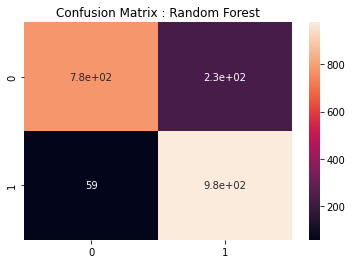

In [ ]:
train = np.array(X_train.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
cv = np.array(X_cv.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
clf = tree.DecisionTreeClassifier()
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(train,y_train)
y_cv_pred = pipe.predict(cv)
y_cv_pred_prob = pipe.predict_proba(cv)
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : Random Forest')
from sklearn.metrics import f1_score
f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
print(f1_DT_)

In [ ]:
y_test_pred = pipe.predict(test.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
output1 = pd.DataFrame(np.column_stack([test_id,y_test_pred]), columns = ('ID','Is_Churn'))
output1.to_csv('ChurnSub5.csv',index = False)
files.download('ChurnSub5.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KNN with FFS

0.7080977734110492


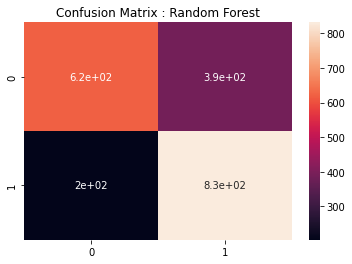

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
train = np.array(X_train.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
cv = np.array(X_cv.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
clf = KNeighborsClassifier(n_neighbors=5,leaf_size = 48,p=2)
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(train,y_train)
y_cv_pred = pipe.predict(cv)
y_cv_pred_prob = pipe.predict_proba(cv)
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : Random Forest')
from sklearn.metrics import f1_score
f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
print(f1_DT_)

In [ ]:
y_test_pred = pipe.predict(test.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
output1 = pd.DataFrame(np.column_stack([test_id,y_test_pred]), columns = ('ID','Is_Churn'))
output1.to_csv('ChurnSub6.csv',index = False)
files.download('ChurnSub6.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

XGBoost with FFS

0.6280028478250885


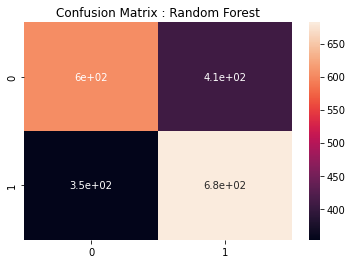

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
train = np.array(X_train.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
cv = np.array(X_cv.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
clf = XGBClassifier()
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(train,y_train)
y_cv_pred = pipe.predict(cv)
y_cv_pred_prob = pipe.predict_proba(cv)
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : Random Forest')
from sklearn.metrics import f1_score
f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
print(f1_DT_)

In [ ]:
y_test_pred = pipe.predict(test.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
output1 = pd.DataFrame(np.column_stack([test_id,y_test_pred]), columns = ('ID','Is_Churn'))
output1.to_csv('ChurnSub7.csv',index = False)
files.download('ChurnSub7.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LR with FFS

0.6045148765612773


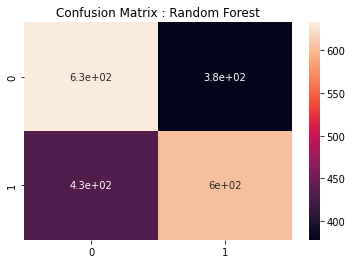

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
train = np.array(X_train.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
cv = np.array(X_cv.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
clf = LogisticRegression()
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(train,y_train)
y_cv_pred = pipe.predict(cv)
y_cv_pred_prob = pipe.predict_proba(cv)
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : Random Forest')
from sklearn.metrics import f1_score
f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
print(f1_DT_)

In [ ]:
y_test_pred = pipe.predict(test.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
output1 = pd.DataFrame(np.column_stack([test_id,y_test_pred]), columns = ('ID','Is_Churn'))
output1.to_csv('ChurnSub8.csv',index = False)
files.download('ChurnSub8.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SVC with FFS

0.6246033418924616


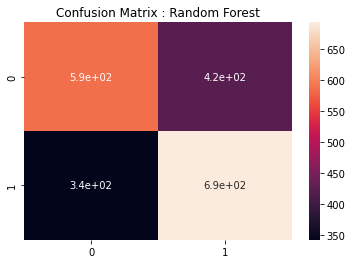

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
train = np.array(X_train.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
cv = np.array(X_cv.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
clf = SVC()
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(train,y_train)
y_cv_pred = pipe.predict(cv)
#y_cv_pred_prob = pipe.predict_proba(cv)
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : Random Forest')
from sklearn.metrics import f1_score
f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
print(f1_DT_)

In [ ]:
y_test_pred = pipe.predict(test.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
output1 = pd.DataFrame(np.column_stack([test_id,y_test_pred]), columns = ('ID','Is_Churn'))
output1.to_csv('ChurnSub_svcffs.csv',index = False)
files.download('ChurnSub_svcffs.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We got test score of 0.58 for Logistic Regression , there for proceeding with LR , Decision Tree is overfitting in nature

SVC hyperparameter tuning

In [ ]:
estimator = LogisticRegression()
parameter = {'C':[6,7,8,9,10],'max_iter':[1000]}
clf = GridSearchCV(estimator,parameter)
train = np.array(X_train.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
cv = np.array(X_cv.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
clf.fit(train,y_train)
y_cv_pred = clf.predict(cv)
#y_cv_pred_prob = pipe.predict_proba(cv)
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : Random Forest')
from sklearn.metrics import f1_score
f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
print(f1_DT_)

###Logistic Regression Hyperparameter Tuning

0.6049981649692633


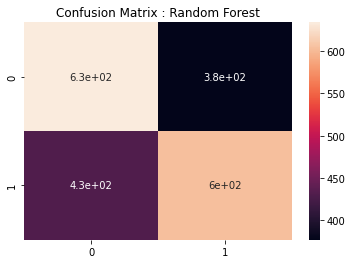

In [ ]:
estimator = LogisticRegression()
parameter = {'C':[6,7,8,9,10],'max_iter':[1000]}
clf = GridSearchCV(estimator,parameter)
train = np.array(X_train.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
cv = np.array(X_cv.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
clf.fit(train,y_train)
y_cv_pred = clf.predict(cv)
#y_cv_pred_prob = pipe.predict_proba(cv)
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : Random Forest')
from sklearn.metrics import f1_score
f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
print(f1_DT_)

In [ ]:
clf.best_params_

{'C': 7, 'max_iter': 1000}

0.6045148765612773


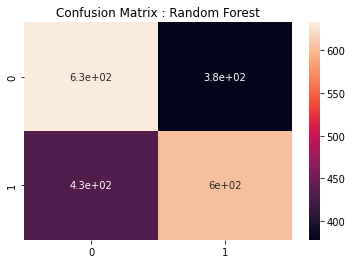

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
train = np.array(X_train.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
cv = np.array(X_cv.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
clf = LogisticRegression(C = 7,max_iter = 1000)
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(train,y_train)
y_cv_pred = pipe.predict(cv)
y_cv_pred_prob = pipe.predict_proba(cv)
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : Random Forest')
from sklearn.metrics import f1_score
f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
print(f1_DT_)

In [ ]:
y_test_pred = pipe.predict(test.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
output1 = pd.DataFrame(np.column_stack([test_id,y_test_pred]), columns = ('ID','Is_Churn'))
output1.to_csv('ChurnSub10.csv',index = False)
files.download('ChurnSub10.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6045148765612773


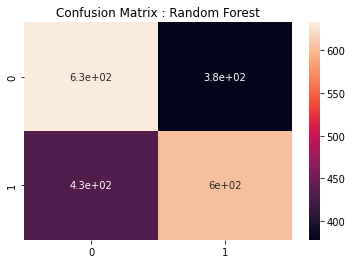

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
train = np.array(X_train.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
cv = np.array(X_cv.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
clf = LogisticRegression(penalty='elasticnet', dual=False, tol=0.0001, C=7, fit_intercept=True, intercept_scaling=1, class_weight=None,
                         random_state=None, solver='saga', 
                         max_iter=1000, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=0.7)
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(train,y_train)
y_cv_pred = pipe.predict(cv)
y_cv_pred_prob = pipe.predict_proba(cv)
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : Random Forest')
from sklearn.metrics import f1_score
f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
print(f1_DT_)

In [ ]:
y_test_pred = pipe.predict(test.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
output1 = pd.DataFrame(np.column_stack([test_id,y_test_pred]), columns = ('ID','Is_Churn'))
output1.to_csv('ChurnSub11.csv',index = False)
files.download('ChurnSub11.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6263653260719914


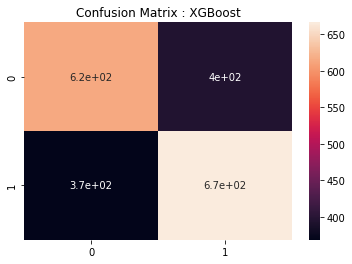

In [ ]:
estimator = XGBClassifier(learning_rate =0.1, n_estimators=3, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

train = np.array(X_train.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
cv = np.array(X_cv.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])

parameter = {'min_samples_leaf':[1],'min_samples_split':[2]}
clf = GridSearchCV(estimator,parameter)

clf.fit(train,y_train)
y_cv_pred = clf.predict(cv)
#y_cv_pred_prob = pipe.predict_proba(cv)
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : XGBoost')
from sklearn.metrics import f1_score
f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
print(f1_DT_)

In [ ]:
clf.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2}

0.6280028478250885


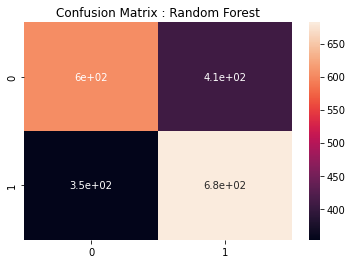

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
train = np.array(X_train.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
cv = np.array(X_cv.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
clf = XGBClassifier(min_samples_leaf = 1,min_samples_split = 2)
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(train,y_train)
y_cv_pred = pipe.predict(cv)
y_cv_pred_prob = pipe.predict_proba(cv)
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
import seaborn as sns
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : Random Forest')
from sklearn.metrics import f1_score
f1_DT_ = f1_score(y_cv, y_cv_pred, average='macro')
print(f1_DT_)

In [ ]:
y_test_pred = pipe.predict(test.loc[:,('Balance','Credit_Category','Transaction_Status','Gender','Income','Credit_Card','Age','Product_Holdings')])
output1 = pd.DataFrame(np.column_stack([test_id,y_test_pred]), columns = ('ID','Is_Churn'))
output1.to_csv('ChurnSub18.csv',index = False)
files.download('ChurnSub18.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>